# 01_Data_Visualization_XYZ(Quadril x Joelho)

## TL;DR
Fazer uma descrição de 3 linhas do objetivo do notebook e conclusões presentes na análise.

## Objetivo

Objetivo: verificar o comportamento e se existe algum padrão em de cada voluntário nos 5 execicíos 

## Dados

Descrever a base de dados utilizada.

## Modelos (opcional)

Em caso de treinamento ou comparação de modelos, descrever os modelos considerados

## Conclusões
Listar **todas** as conclusões obtidas no notebook:
1. conclusão 1
2. conclusão 2
3. etc.


## Observações importantes:
1. Sempre organize o conteúdo utilizando células markdown e seções. Também utilize células de texto para escrever sua análise das figuras que forem geradas.
2. Lembre-se que essa primeira célula deve ter informação suficiente para entender o que foi feito e quais conclusões você chegou, sem ter que ler o notebook inteiro. Isso agiliza muito a busca por informações ao longo do projeto. Além disso, seu eu do futuro (ou novas pessoas que entrem no projeto) vai agradecer se o seu notebook estiver bem escrito e completo.

# Importando as Bibliotecas

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

É possível observar que os eixos X em ambos os gráficos apresentam grande oscilação, tornando sua utilização para a análise de compensação de movimento mais desafiadora.

## Graficos dos Eixos X, Y e Z do Quadril com o index temporal

<Figure size 1000x600 with 0 Axes>

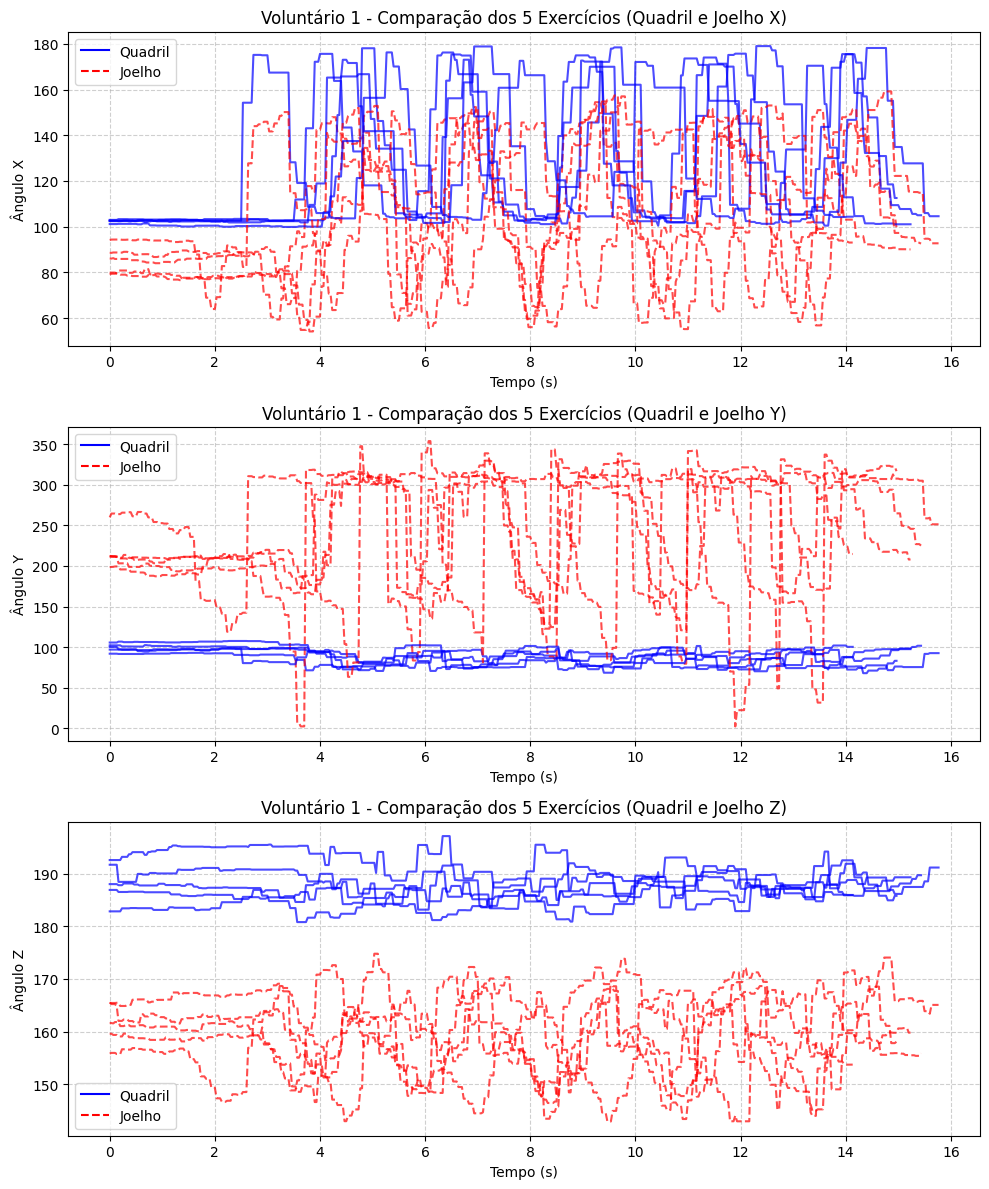

<Figure size 1000x600 with 0 Axes>

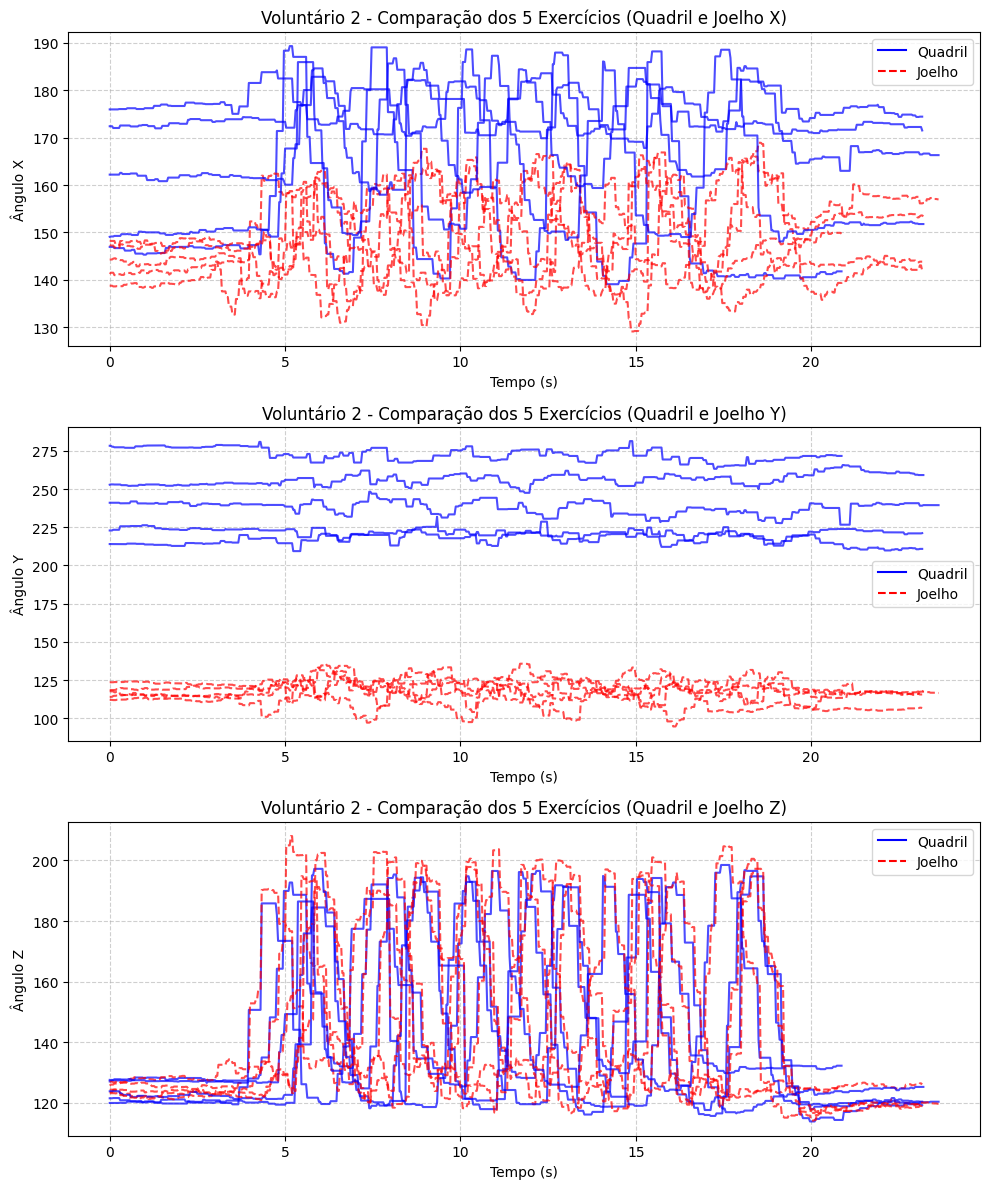

<Figure size 1000x600 with 0 Axes>

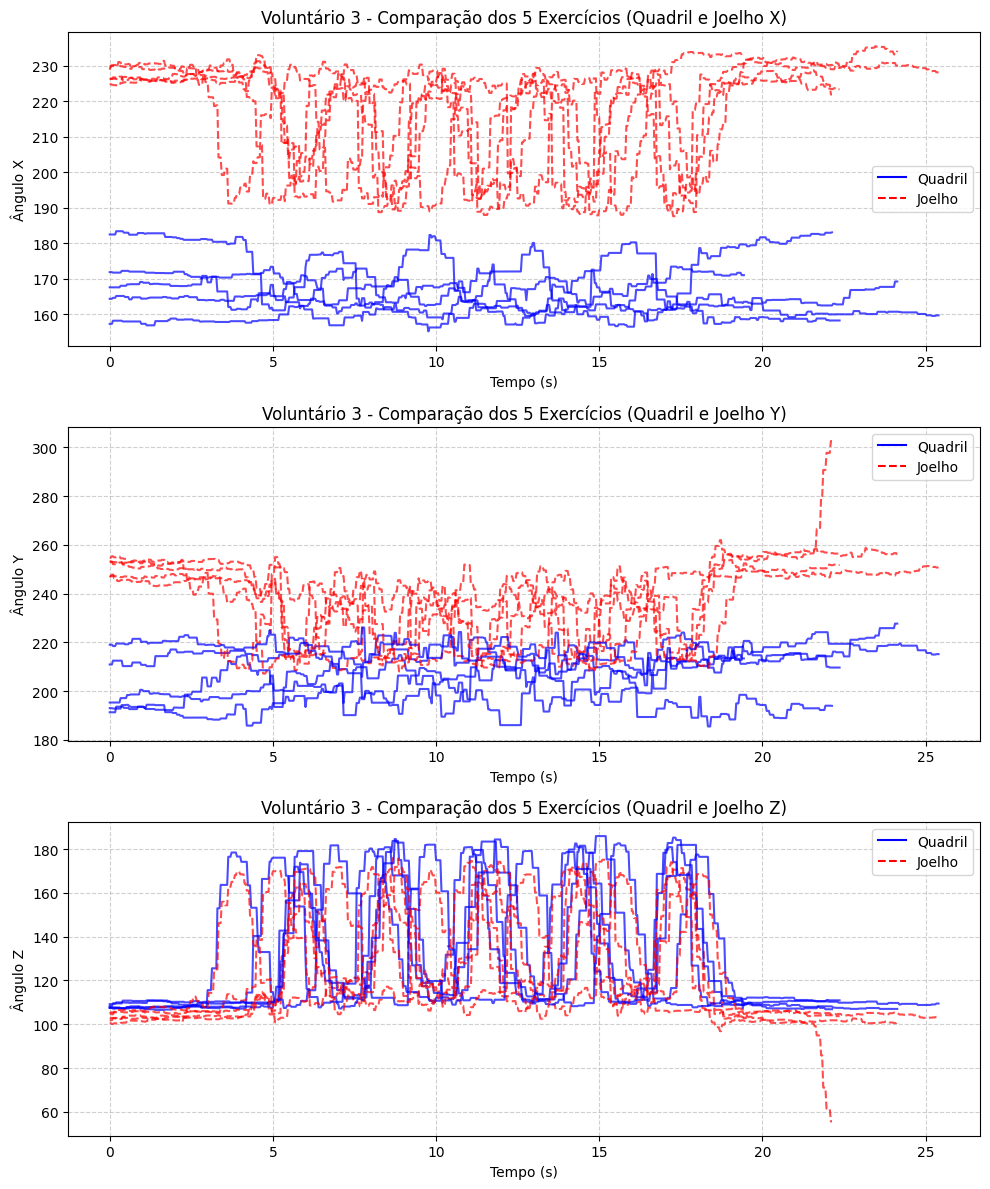

<Figure size 1000x600 with 0 Axes>

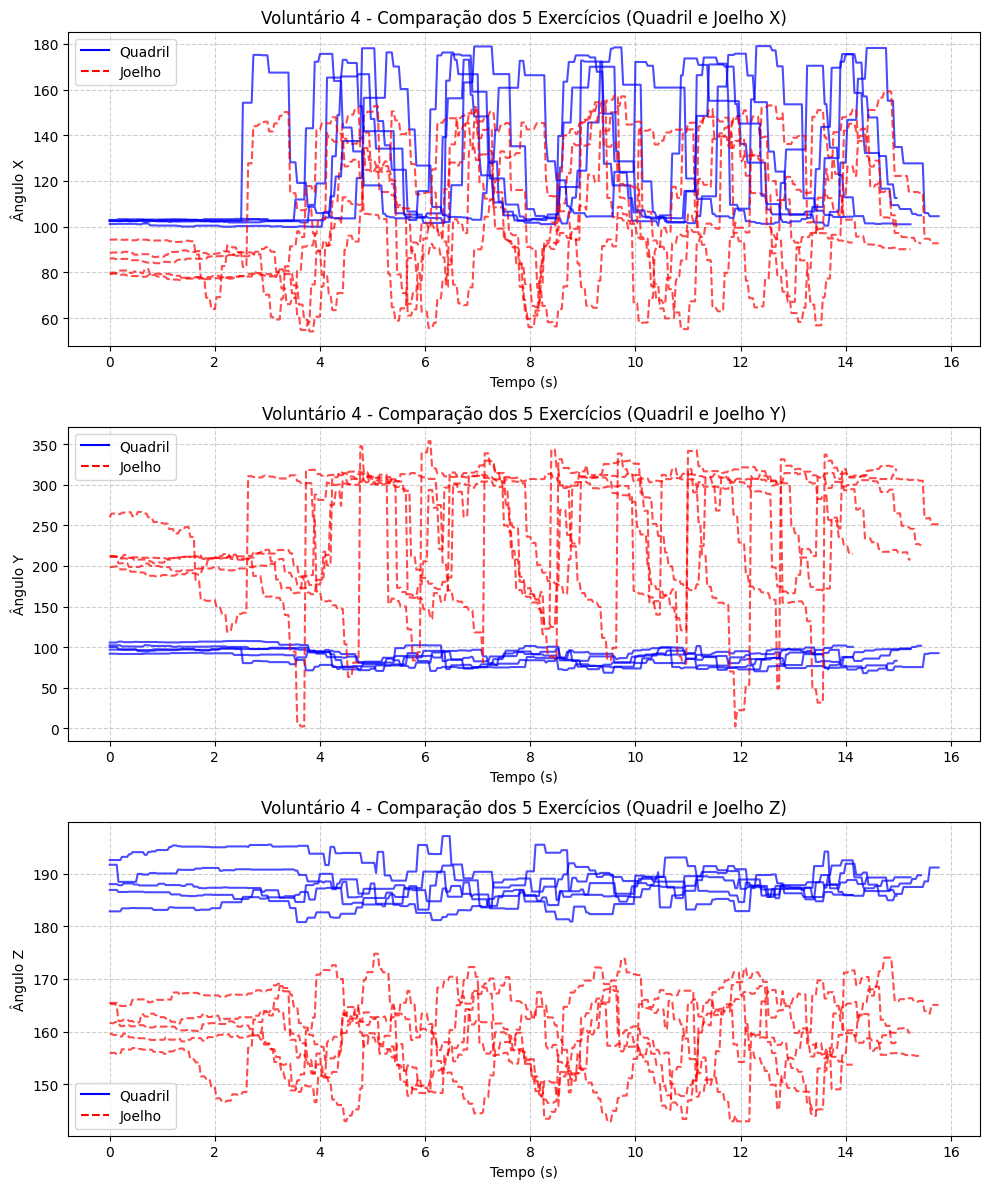

<Figure size 1000x600 with 0 Axes>

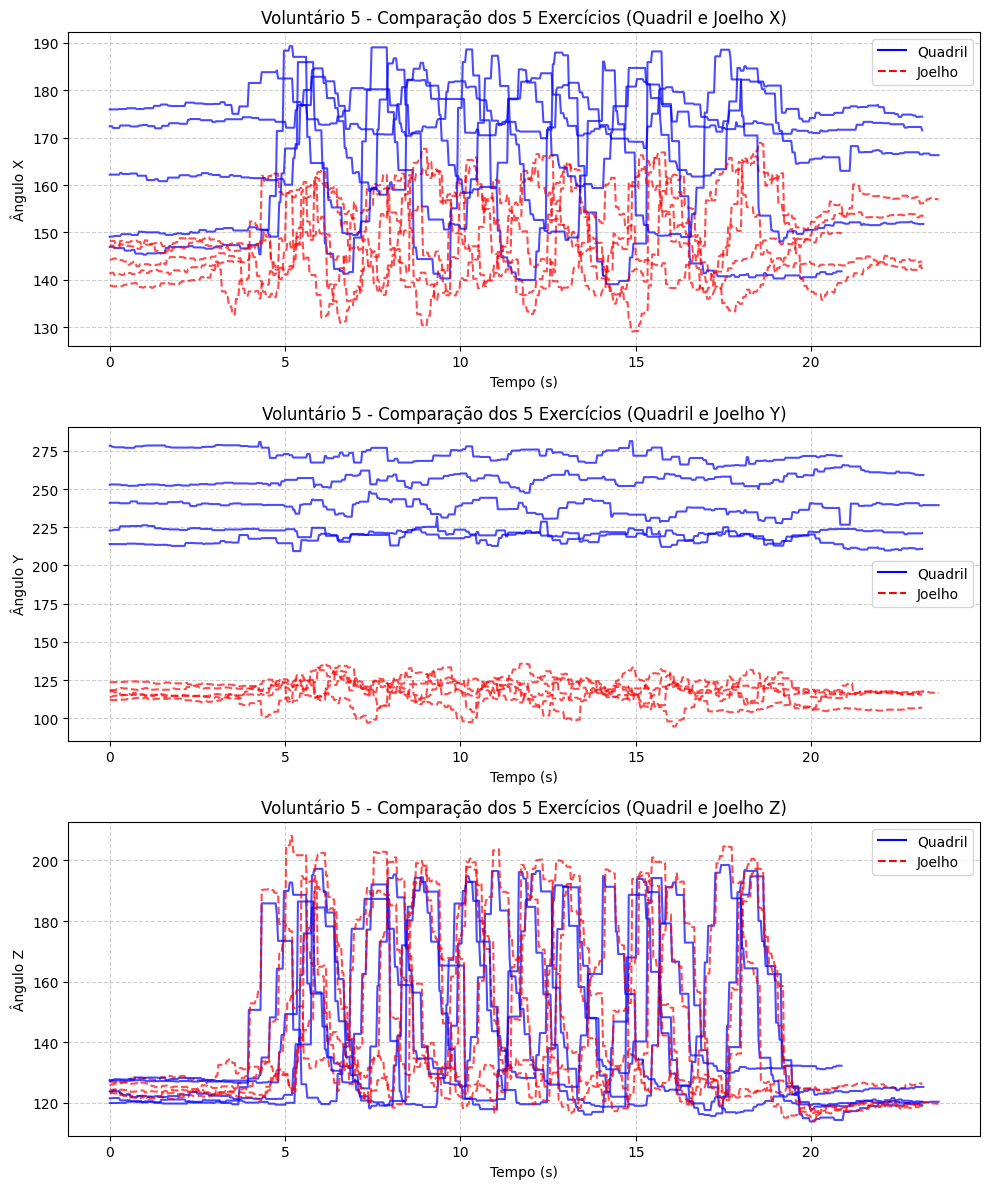

<Figure size 1000x600 with 0 Axes>

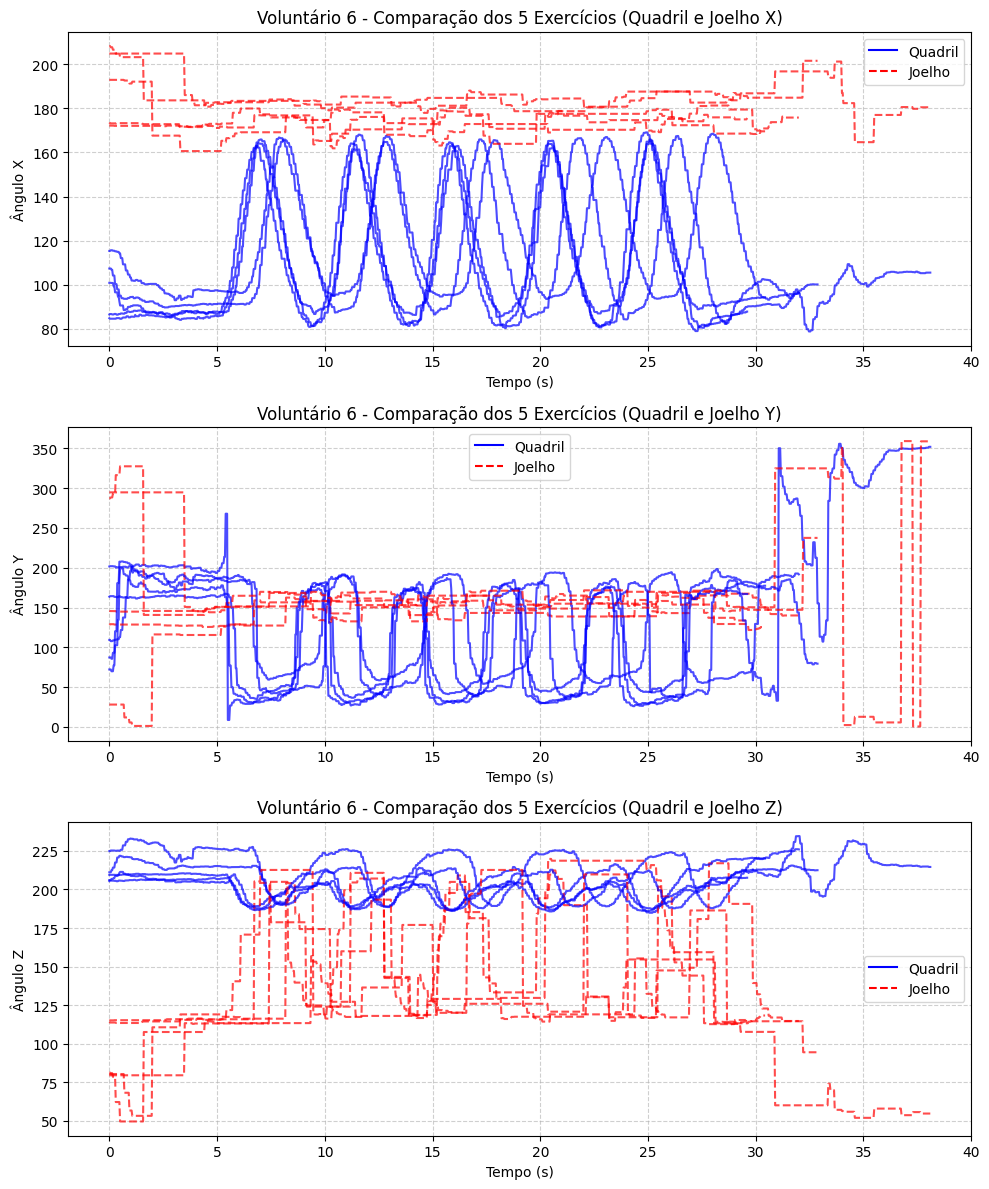

<Figure size 1000x600 with 0 Axes>

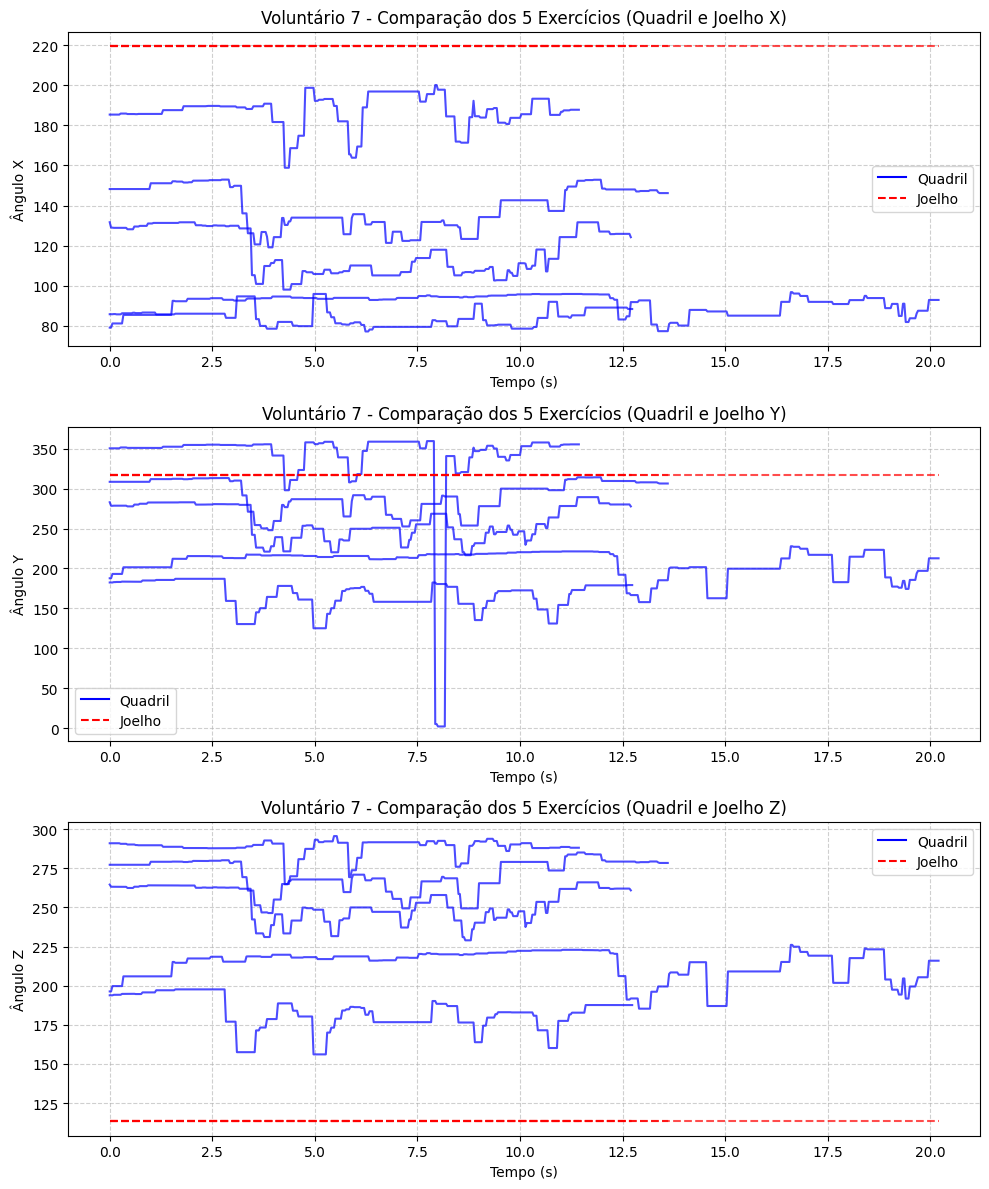

In [60]:
import matplotlib.pyplot as plt
import pandas as pd
import glob
import os

# Definir o caminho dos arquivos tratados
caminho_dados = "../../data/data_tratado"  # Ajuste conforme necessário

# Lista de voluntários
voluntarios = [f"Voluntário {i}" for i in range(1, 8)]  # Voluntário 1 a 7

# Processar cada voluntário
for voluntario in voluntarios:
    arquivos = sorted(glob.glob(f"{caminho_dados}/{voluntario}_Ex*.csv"))  # Encontrar os 5 exercícios
    plt.figure(figsize=(10, 6))
    
    fig, axes = plt.subplots(3, 1, figsize=(10, 12))  # Criar 3 subplots para X, Y e Z
    
    for idx, arquivo in enumerate(arquivos):
        df = pd.read_csv(arquivo, header=None)
        
        timestamp = df.iloc[:, -1]  # Última coluna (Tempo)
        quadril_x = df.iloc[:, 19]  # Ângulo do Quadril X
        quadril_y = df.iloc[:, 20]  # Ângulo do Quadril Y
        quadril_z = df.iloc[:, 21]  # Ângulo do Quadril Z
        joelho_x = df.iloc[:, 22]  # Ângulo do Joelho X
        joelho_y = df.iloc[:, 23]  # Ângulo do Joelho Y
        joelho_z = df.iloc[:, 24]  # Ângulo do Joelho Z
        
        axes[0].plot(timestamp, quadril_x, color="blue", alpha=0.7)
        axes[0].plot(timestamp, joelho_x, linestyle="dashed", color="red", alpha=0.7)
        
        axes[1].plot(timestamp, quadril_y, color="blue", alpha=0.7)
        axes[1].plot(timestamp, joelho_y, linestyle="dashed", color="red", alpha=0.7)
        
        axes[2].plot(timestamp, quadril_z, color="blue", alpha=0.7)
        axes[2].plot(timestamp, joelho_z, linestyle="dashed", color="red", alpha=0.7)
    
    # Definir a legenda apenas com Quadril e Joelho
    axes[0].plot([], [], color="blue", label="Quadril")
    axes[0].plot([], [], linestyle="dashed", color="red", label="Joelho")
    
    axes[1].plot([], [], color="blue", label="Quadril")
    axes[1].plot([], [], linestyle="dashed", color="red", label="Joelho")
    
    axes[2].plot([], [], color="blue", label="Quadril")
    axes[2].plot([], [], linestyle="dashed", color="red", label="Joelho")

    
    axes[0].set_title(f"{voluntario} - Comparação dos 5 Exercícios (Quadril e Joelho X)")
    axes[0].set_xlabel("Tempo (s)")
    axes[0].set_ylabel("Ângulo X")
    axes[0].grid(True, linestyle="--", alpha=0.6)
    axes[0].legend()
    
    axes[1].set_title(f"{voluntario} - Comparação dos 5 Exercícios (Quadril e Joelho Y)")
    axes[1].set_xlabel("Tempo (s)")
    axes[1].set_ylabel("Ângulo Y")
    axes[1].grid(True, linestyle="--", alpha=0.6)
    axes[1].legend()
    
    axes[2].set_title(f"{voluntario} - Comparação dos 5 Exercícios (Quadril e Joelho Z)")
    axes[2].set_xlabel("Tempo (s)")
    axes[2].set_ylabel("Ângulo Z")
    axes[2].grid(True, linestyle="--", alpha=0.6)
    axes[2].legend()
    
    plt.tight_layout()
    plt.show()

Foi possível observar que nos voluntários 2, 3 e 5 há um padrão consistente no ângulo Z, onde o movimento do quadril acompanha de forma clara e sincronizada o movimento do joelho, indicando uma coordenação evidente entre essas articulações durante os exercícios.

- O vol. 7 nao tem dados de joelho com variação ao longo do tempo, é possível que não (como visto nas análises)
todo: escrever todas as conclusoes que comentamos

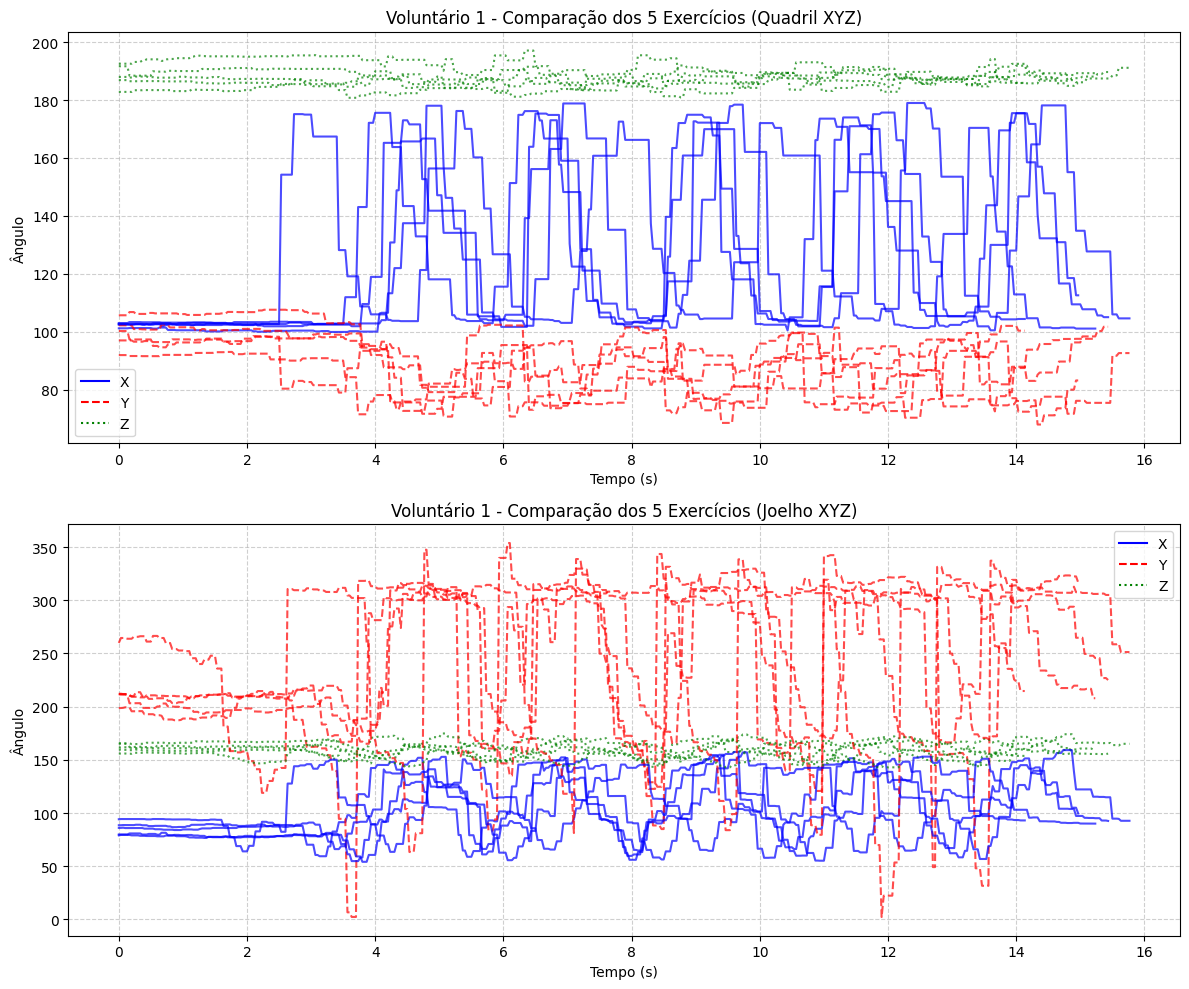

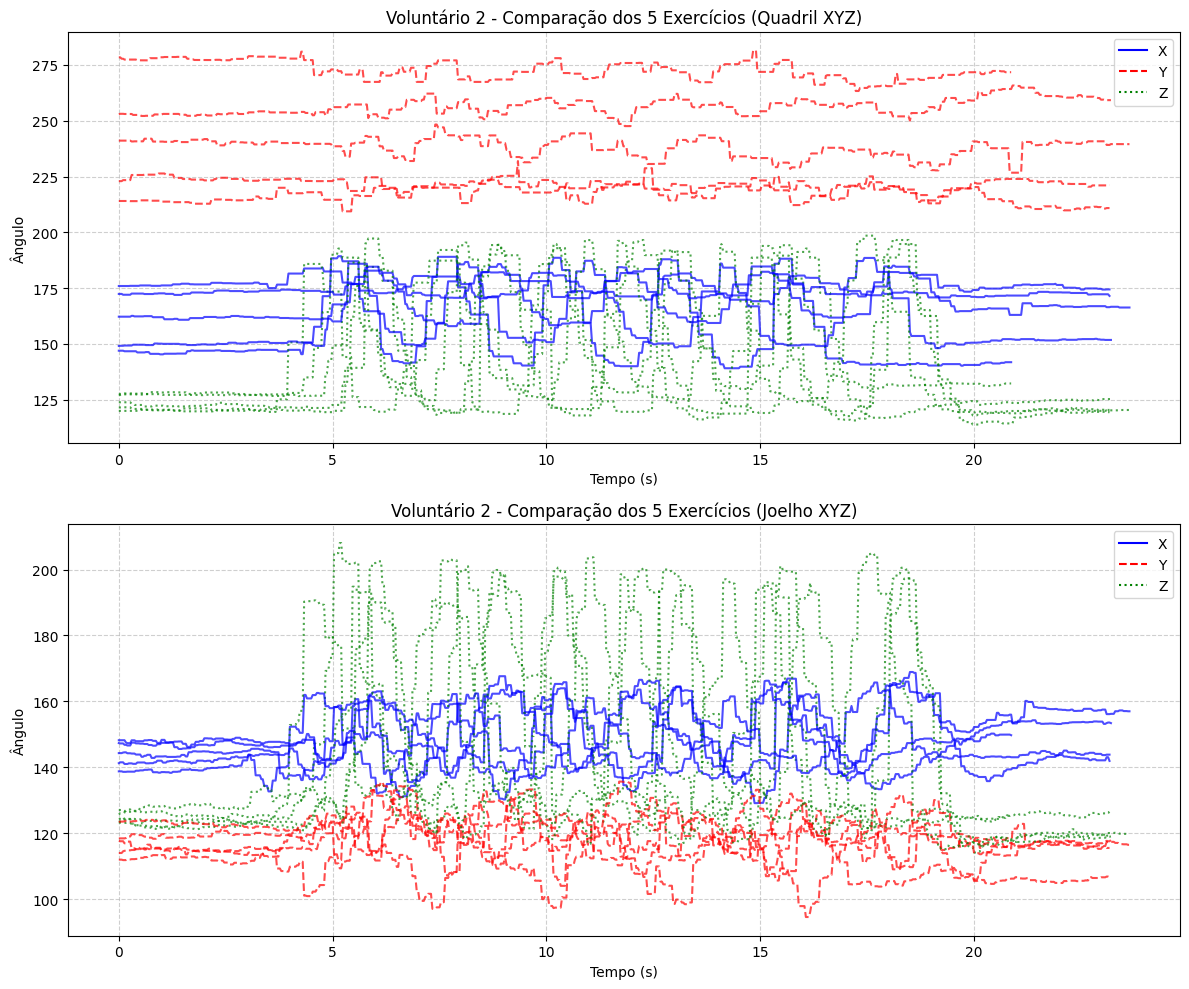

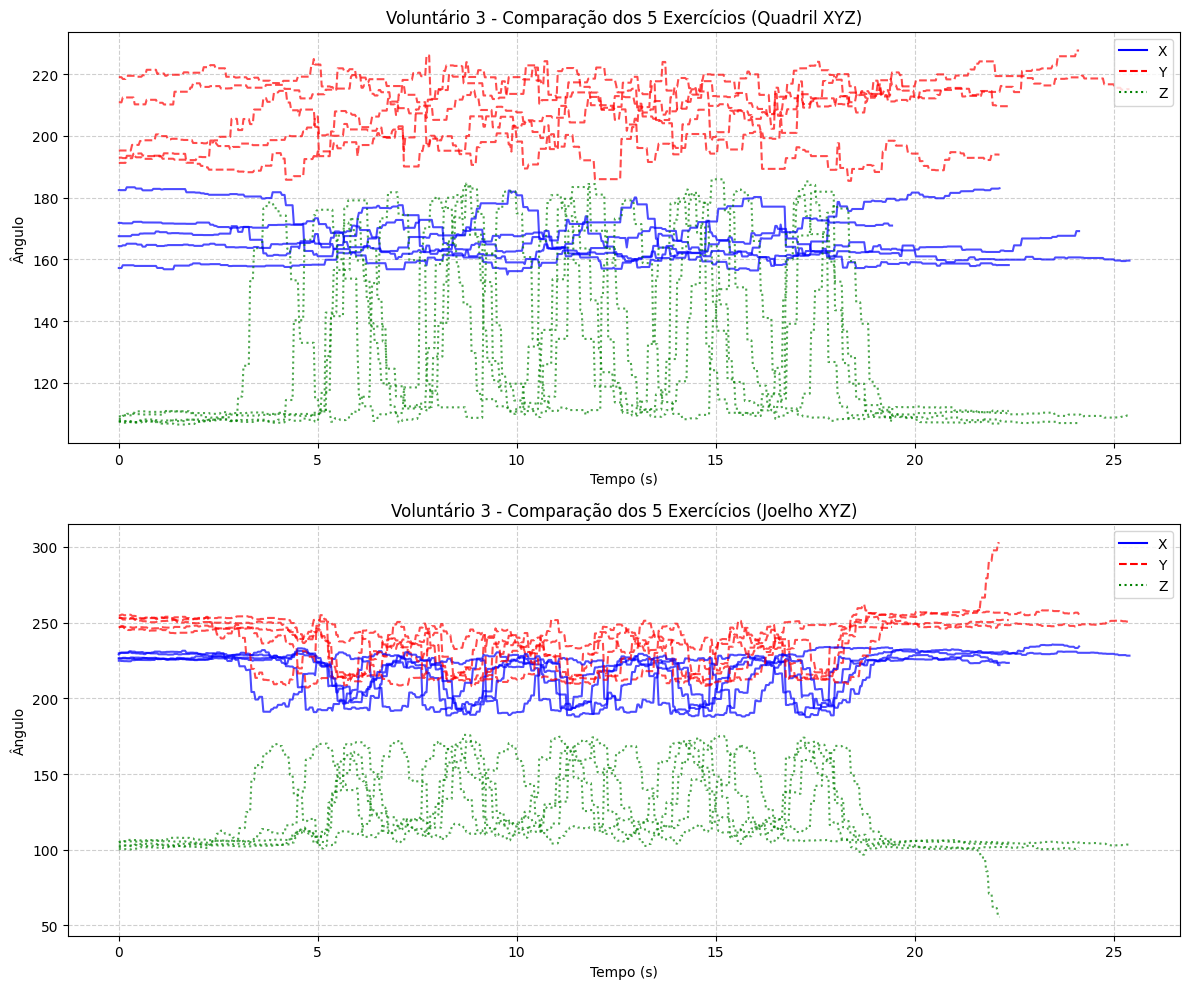

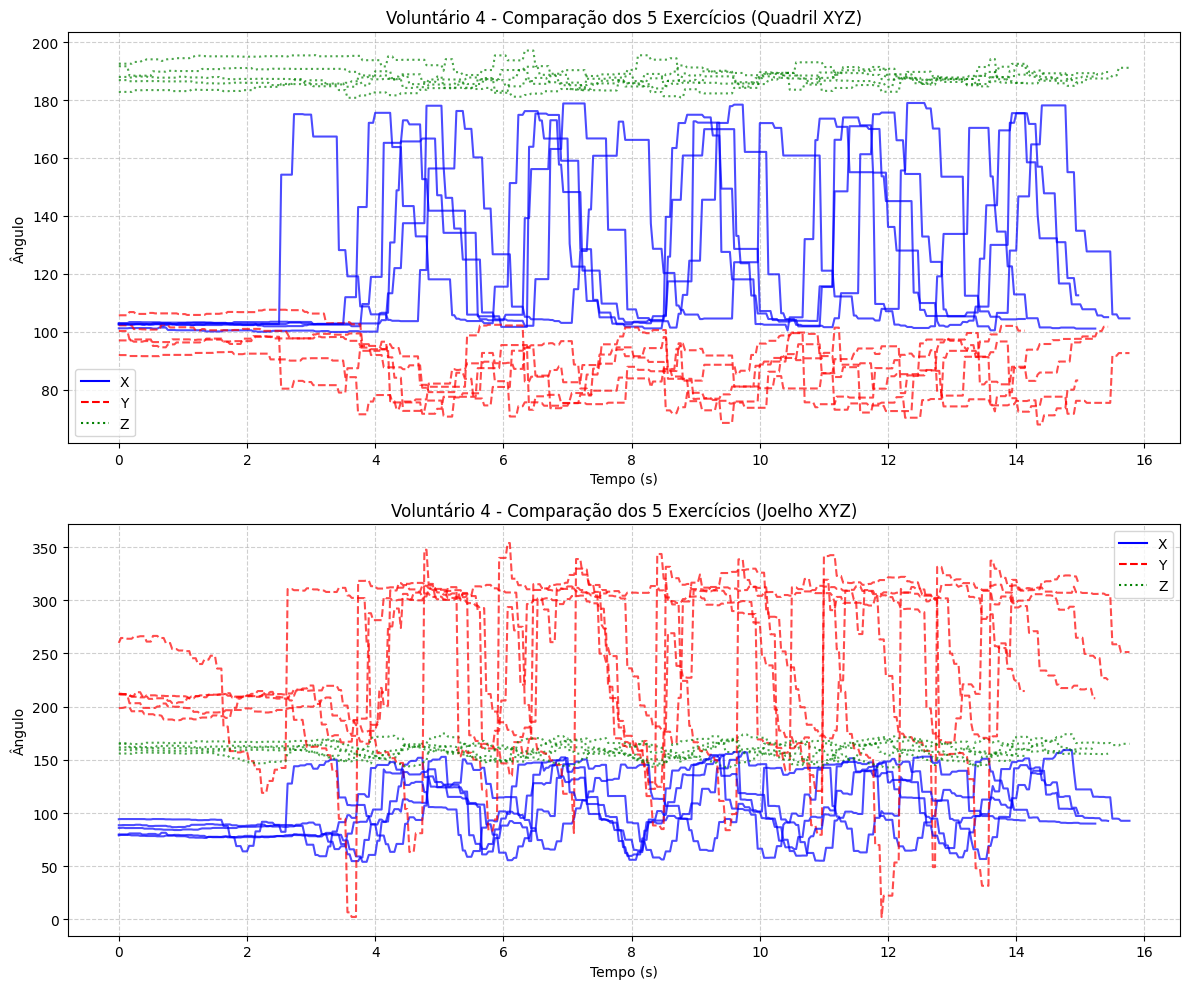

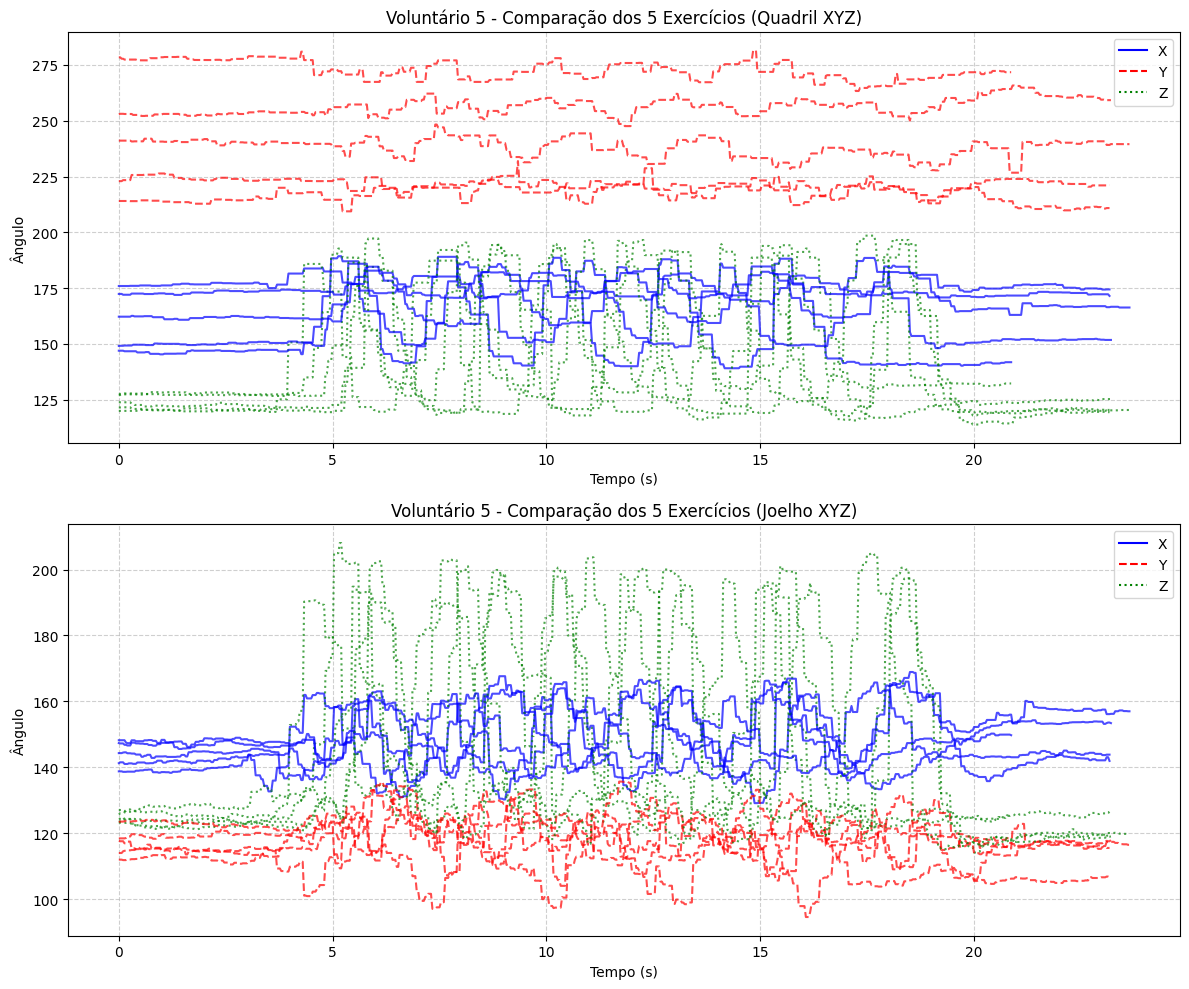

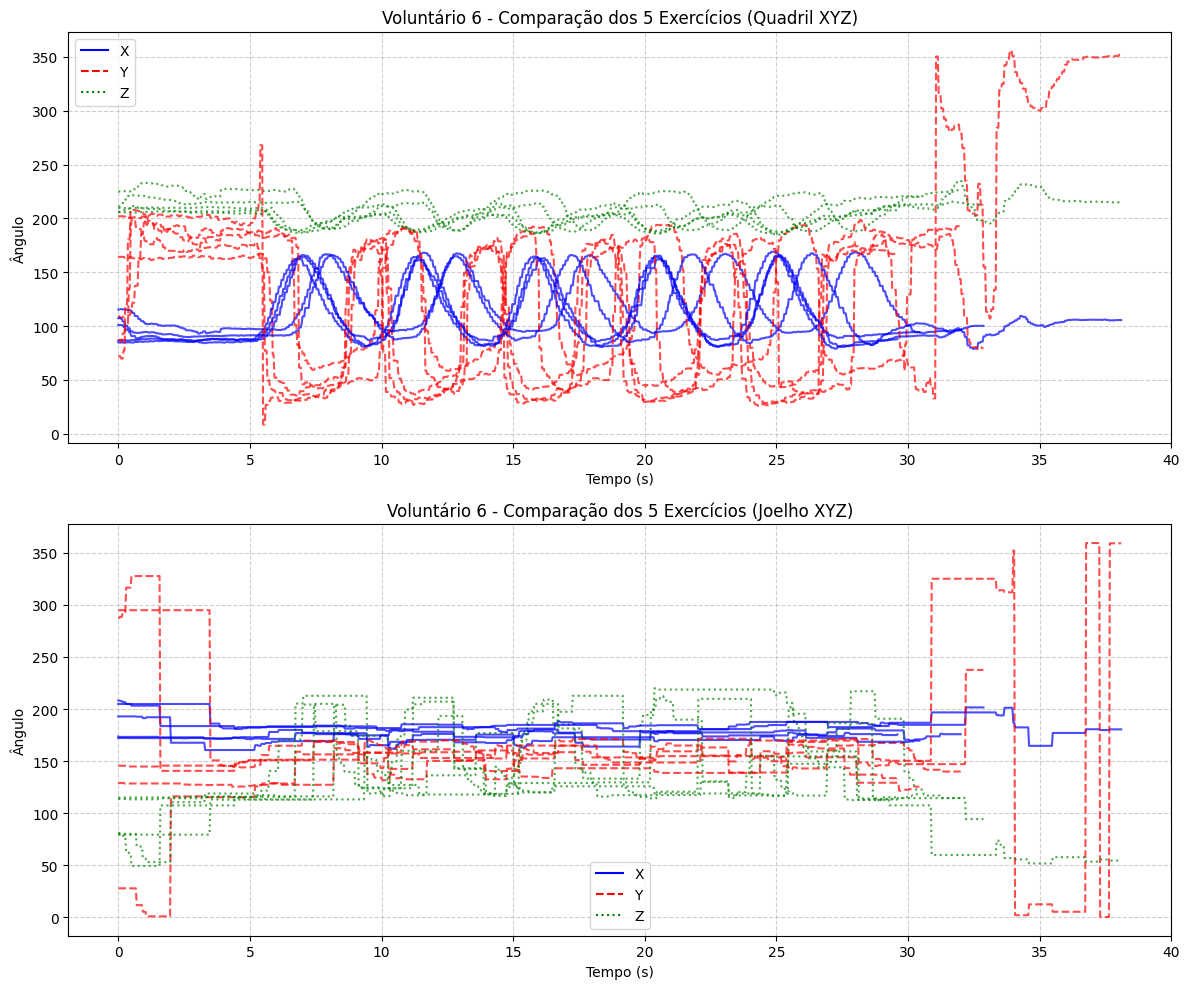

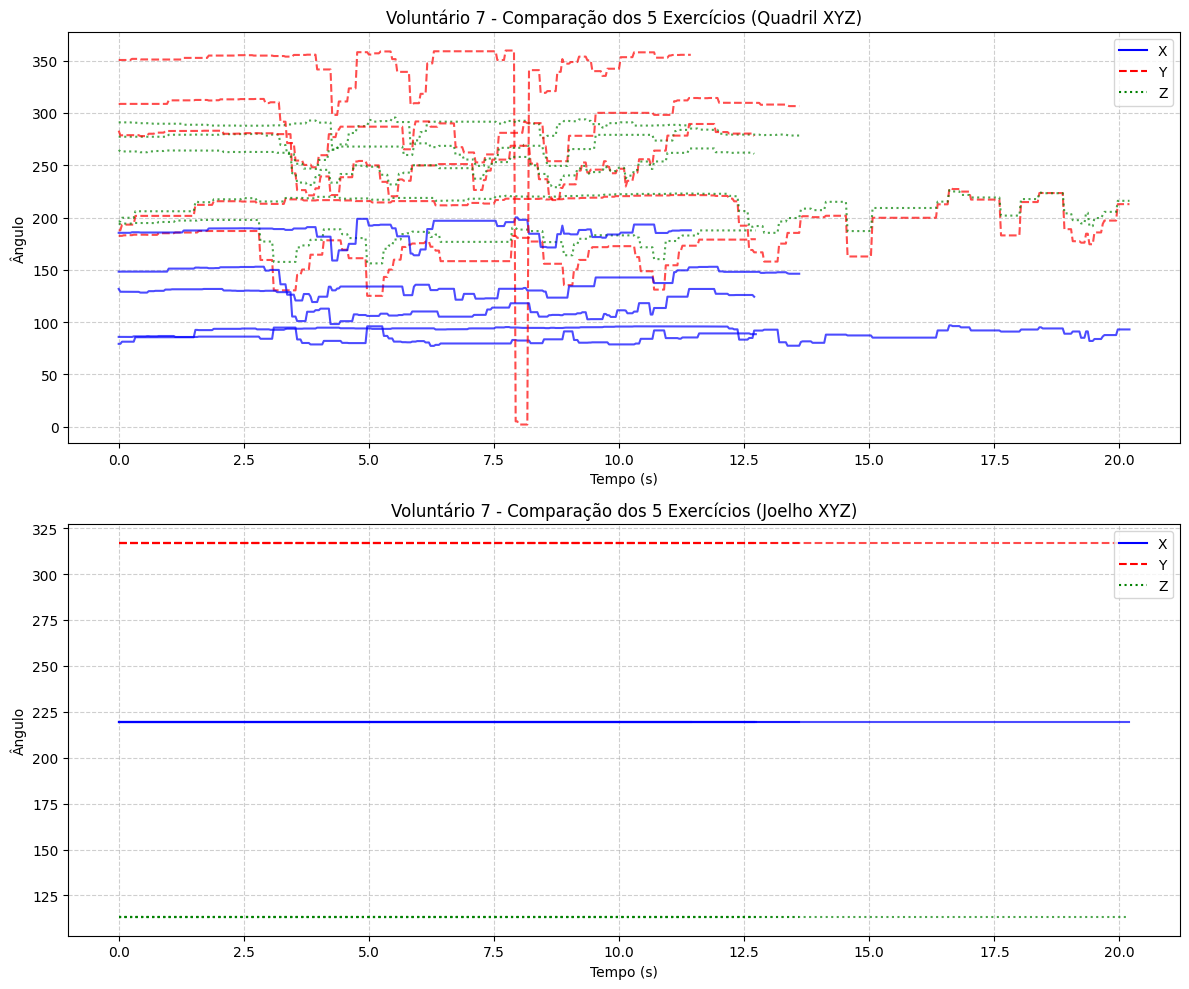

In [55]:
import matplotlib.pyplot as plt
import pandas as pd
import glob
import os

# Definir o caminho dos arquivos tratados
caminho_dados = "../../data/data_tratado"  # Ajuste conforme necessário

# Lista de voluntários
voluntarios = [f"Voluntário {i}" for i in range(1, 8)]  # Voluntário 1 a 7

# Definir cores específicas para X, Y e Z
cores = {"X": "blue", "Y": "red", "Z": "green"}

# Processar cada voluntário
for voluntario in voluntarios:
    arquivos = sorted(glob.glob(f"{caminho_dados}/{voluntario}_Ex*.csv"))  # Encontrar os 5 exercícios
    
    if not arquivos:
        print(f"⚠️ Nenhum arquivo encontrado para {voluntario}.")
        continue
    
    fig, axes = plt.subplots(2, 1, figsize=(12, 10))  # Criar dois gráficos separados: Quadril e Joelho
    
    for idx, arquivo in enumerate(arquivos):
        df = pd.read_csv(arquivo, header=None)
        
        timestamp = df.iloc[:, -1]  # Última coluna (Tempo)
        quadril_x = df.iloc[:, 19]  # Ângulo do Quadril X
        quadril_y = df.iloc[:, 20]  # Ângulo do Quadril Y
        quadril_z = df.iloc[:, 21]  # Ângulo do Quadril Z
        joelho_x = df.iloc[:, 22]  # Ângulo do Joelho X
        joelho_y = df.iloc[:, 23]  # Ângulo do Joelho Y
        joelho_z = df.iloc[:, 24]  # Ângulo do Joelho Z
        
        axes[0].plot(timestamp, quadril_x, label=label_exercicio, color=cores["X"], alpha=0.7)
        axes[0].plot(timestamp, quadril_y, linestyle="dashed", color=cores["Y"], alpha=0.7)
        axes[0].plot(timestamp, quadril_z, linestyle="dotted", color=cores["Z"], alpha=0.7)
        
        axes[1].plot(timestamp, joelho_x, label=label_exercicio, color=cores["X"], alpha=0.7)
        axes[1].plot(timestamp, joelho_y, linestyle="dashed", color=cores["Y"], alpha=0.7)
        axes[1].plot(timestamp, joelho_z, linestyle="dotted", color=cores["Z"], alpha=0.7)
    
    # Adicionar legenda adicional para diferenciar X, Y e Z
    axes[0].plot([], [], color=cores["X"], linestyle="solid", label="X")
    axes[0].plot([], [], color=cores["Y"], linestyle="dashed", label="Y")
    axes[0].plot([], [], color=cores["Z"], linestyle="dotted", label="Z")
    
    axes[1].plot([], [], color=cores["X"], linestyle="solid", label="X")
    axes[1].plot([], [], color=cores["Y"], linestyle="dashed", label="Y")
    axes[1].plot([], [], color=cores["Z"], linestyle="dotted", label="Z")
    
    axes[0].set_title(f"{voluntario} - Comparação dos 5 Exercícios (Quadril XYZ)")
    axes[0].set_xlabel("Tempo (s)")
    axes[0].set_ylabel("Ângulo")
    axes[0].grid(True, linestyle="--", alpha=0.6)
    axes[0].legend()
    
    axes[1].set_title(f"{voluntario} - Comparação dos 5 Exercícios (Joelho XYZ)")
    axes[1].set_xlabel("Tempo (s)")
    axes[1].set_ylabel("Ângulo")
    axes[1].grid(True, linestyle="--", alpha=0.6)
    axes[1].legend()
    
    plt.tight_layout()
    plt.show()

Os eixos Y e Z permitem uma melhor identificação das variações ao longo do tempo, facilitando a análise do movimento.

# Conclusões

Ao longo deste teste, foi possível realizar uma análise detalhada dos ângulos do joelho e do quadril, tanto de forma individual quanto sincronizada. A separação clara dos eixos X, Y e Z permitiu uma avaliação mais precisa do comportamento de cada articulação ao longo do tempo. Além disso, identificou-se que os eixos X apresentaram maior oscilação, dificultando sua utilização na análise de compensação de movimento, enquanto os eixos Y e Z se mostraram mais estáveis e úteis para identificar variações. Dessa forma, a abordagem utilizada possibilitou uma melhor compreensão dos padrões de movimento e abre caminho para futuras investigações e aprimoramentos na análise biomecânica.
Pode copiar todo o conteúdo dessa seção lá na parte de conclusões do cabeçalho.